In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Metod najbržeg pada

Ovim metodom se traži minimum diferencijabilne funkcije f(x) = f(x1, x2, ..., xn) tako što se u svakoj iteraciji tekuće rešenje pomera u pravcu negativnog gradijenta f

\begin{equation}
    \nabla f= \left[ \frac{\partial f}{\partial x1}, \frac{\partial f}{\partial x1}, ..., \frac{\partial f}{\partial xn} \right]^{T}
\end{equation}

Metod se sastoji iz sledećih koraka

1. __Inicijalizacija__. Odabere se početno pogađanje rešenja  $ x_{0} $, veličina koraka $ \gamma > 0 $, i tolerancija $\epsilon > 0 $, maksimalan broj koraka N.

2. __Telo metode koje primenjujemo iterativno___. U k-toj iteraciji, imamo da je
\begin{equation}
    x_{k+1} = x_{k} - \gamma\nabla f(x_{k})
\end{equation}

3. __Kriterijum zaustavljanja__. Na kraju svake iteracije proveravamo uslov 

\begin{equation}
    \| \nabla f(x_k)\| < \epsilon 
\end{equation}

Kada se taj kriterijum ispuni ili dostignemo maksimalan broj iteracija tada se algoritam zaustavlja.

In [2]:
def steepest_descent(gradf, x0, gamma, epsilon, N):
    x = np.array(x0).reshape(len(x0), 1)
    for k in range(N):
        g = gradf(x)
        x = x - gamma*g
        if np.linalg.norm(g) < epsilon:
            break
    return x

In [3]:
def quadratic(x, M, reshape = True):
    if reshape:
        x = np.reshape(x, newshape=(len(x), 1))
    val = 1/2 *np.transpose(x) @ M @ x
    return val[0, 0]

In [4]:
def quadratic_grad(x, M, reshape = True):
    if reshape:
        x = np.array(x).reshape(len(x), 1)
    return M @ x

In [5]:
steepest_descent(lambda x: quadratic_grad(x, np.eye(2)), [1, 2], 1, 1e-4, 100)

array([[0.],
       [0.]])

In [6]:
def steepest_descent_v(gradf, x0, gamma, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    for k in range(N):
        g = gradf(x[-1])
        x.append(x[-1] - gamma*g)
        if np.linalg.norm(g) < epsilon:
            break
    return x

In [14]:
I = np.eye(2)
run_sd_I = steepest_descent_v(
    lambda x: quadratic_grad(x, I),
    x0 = [1, 1],
    gamma = 0.1,
    epsilon = 1e-4,
    N = 100
)

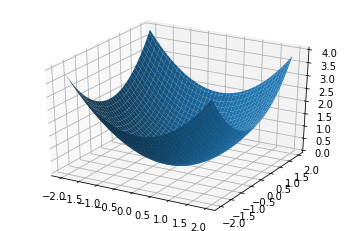

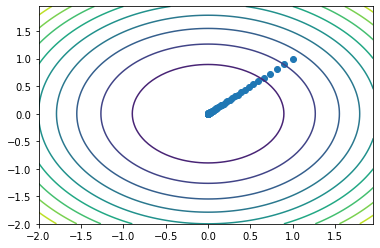

In [57]:
def plot_descent(run_sd_I, x = np.arange(-2,2,0.05), M = np.eye(2)):
    x1 = x2 = x
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((len(x1),len(x2)))
    for i in range(0, len(x1), 1):
        for j in range(0, len(x1), 1):
            a = X1[i, j]
            b = X2[i, j]
            arr = np.array([a, b])
            f[i,j] = quadratic(arr, M)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    p1 = ax.plot_surface(X1, X2, f)
    plt.show()
    run_sd_I = np.reshape(run_sd_I, (len(run_sd_I) , 2))
    plt.scatter(run_sd_I[:, 0], run_sd_I[:, 1])
    plt.contour(X1, X2, f, 10)
    plt.show()
    
plot_descent(run_sd_I)

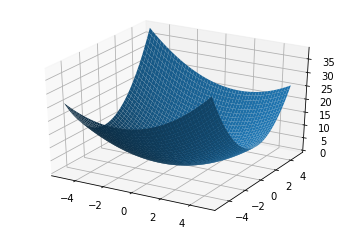

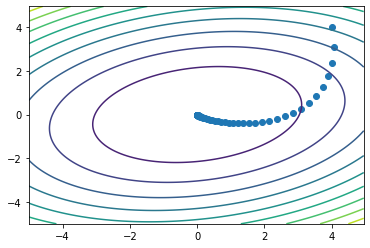

In [64]:
M1 = np.array([[1, 0],
               [0, 2]]) # jedna osa veca od druge
RM = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]])
M1 = RM @ M1 # rotacija
run_sd_M1 = run = steepest_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [4, 4],
    gamma = 0.1,
    epsilon = 1e-4,
    N = 100
)
plot_descent(run_sd_M1, np.arange(-5, 5, 0.05), M1)

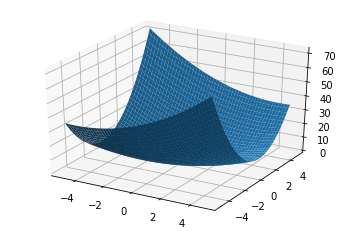

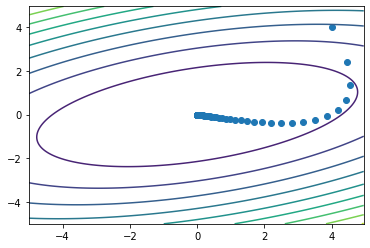

In [65]:
M1 = np.array([[1, 0],
               [0, 4]]) # jedna osa veca od druge
RM = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]])
M1 = RM @ M1 # rotacija
run_sd_M1 = run = steepest_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [4, 4],
    gamma = 0.1,
    epsilon = 1e-4,
    N = 100
)
plot_descent(run_sd_M1, np.arange(-5, 5, 0.05), M1)

Povećamo parametar gama: 

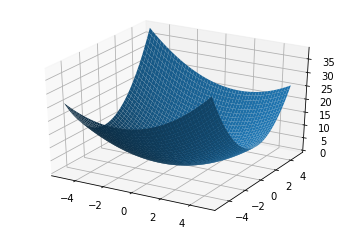

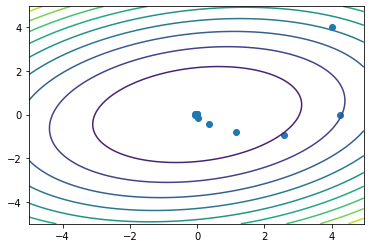

In [68]:
M1 = np.array([[1, 0],
               [0, 2]]) # jedna osa veca od druge
RM = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]])
M1 = RM @ M1 # rotacija
run_sd_M1 = run = steepest_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [4, 4],
    gamma = 0.45,
    epsilon = 1e-4,
    N = 100
)
plot_descent(run_sd_M1, np.arange(-5, 5, 0.05), M1)

Prevelika gama:

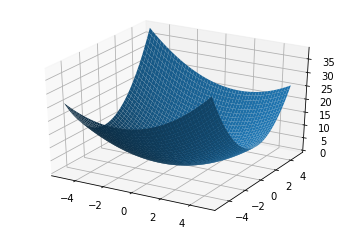

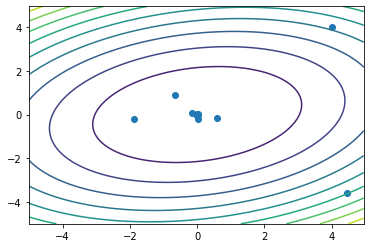

In [78]:
M1 = np.array([[1, 0],
               [0, 2]]) # jedna osa veca od druge
RM = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]])
M1 = RM @ M1 # rotacija
run_sd_M1 = run = steepest_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [4, 4],
    gamma = 0.85,
    epsilon = 1e-4,
    N = 100
)
plot_descent(run_sd_M1, np.arange(-5, 5, 0.05), M1)

## Osnovne modifikacije metode najbržeg pada

### Gradijentni metod sa momentom

Kod gradijentnog pravila sa momentom, opšta struktura algoritma ostaje neizmenjena, samo se tekuća pozicija u procesu pretrage ažurira na nešto izmenjen način

\begin{equation}
    \nu = \omega \nu_{k-1} + \gamma\nabla f(X_k)
\end{equation}

\begin{equation}
    X_{k+1} = X_k - \nu_k
\end{equation}

In [83]:
def steepest_descent_with_momentum_v(gradf, x0, gamma, epsilon, omega, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    for k in range(N):
        g = gradf(x[-1])
        v = omega*v + gamma*g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x

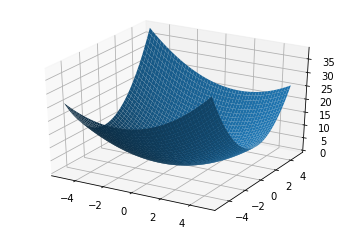

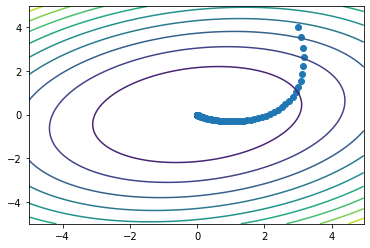

In [87]:
run_sdm_M1a = steepest_descent_with_momentum_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [3, 4],
    gamma = 0.55*0.1, epsilon = 1e-4, omega = 0.15*0.9, N = 100
)
plot_descent(run_sdm_M1a, np.arange(-5, 5, 0.05), M1)

__Zašto ovo ima smisla?__ Proces optimizacije može se zamisliti kao proces pri kome loptica (tekuće rešenje) klizi (sa trenjem) niz strmu podlogu (kriterijum optimalnosti). Momenat daje dodatni fizički smisao ovoj predstavi: momenat - na neki način - predstavlja energiju koju akumuliramo tokom kretanja. Posledično, brzine će se filtrirati: __komponente brzine koje iz iteracije u iteraciju ostaju isto usmerene sabiraće se, dok će se komponente promenljivog smera međusobno poništavati.__

### Ubrzani gradijent Nesterova

Osnovna ideja kod ubrzanog gradijenta Nestorova jeste da se gradijent računa u budućoj tački.

\begin{equation}
    x_{k}^{'} = x_{k-1} - \omega \nu_{k-1}
\end{equation}

\begin{equation}
    \nu_k = \omega \nu_{k-1} + \gamma \nabla f(x_{k}^{'})
\end{equation}

\begin{equation}
    x_{k+1} = x_k - \nu_k
\end{equation}


Ključna stvar kod ubrzanog gradijenta Nestorova jeste da se gradijent ne računa u tekućoj tački već u pretpostavljenoj budućoj tački. Na taj način, čitavoj proceduri dajemo izvestan prediktivni karakter, pa očekujemo i poboljšanje u njenom opštem ponašanju.

In [90]:
def nestorov_gradient_descent_v(gradf, x0, gamma, epsilon, omega, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape=x[-1].shape)
    for k in range(N):
        xpre = x[-1] - omega*v
        g = gradf(xpre)
        v = omega*v + gamma*g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x

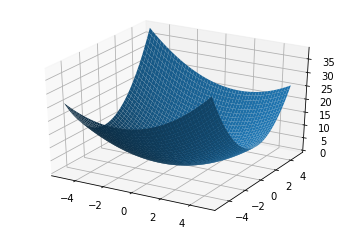

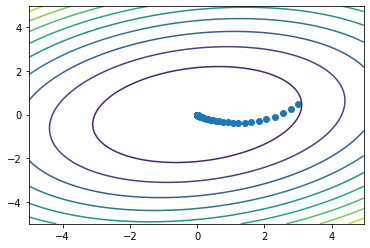

In [127]:
run_sdm_M1b = nestorov_gradient_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [3, 0.5],
    gamma = 0.1, epsilon = 1e-4, omega = 0.15*0.9, N = 100
)
plot_descent(run_sdm_M1b, np.arange(-5, 5, 0.05), M1)

## Poređenje do  sada razmatranih algoritama na složenijem primeru
<br>
<br>
Uzmimo funkciju:
\begin{equation}
    f(x_1, x_2) = 1.5x_1^2 + x_2^2 - 2x_1x_2 + 2x_1^3 + 0.5x_1^4
\end{equation}

In [115]:
def f_slozena(x1, x2):
    return 1.5*x1**2 + x2**2 - 2*x1*x2 + 2*x1**3 + 0.5*x1**4


def grad_slozena(x):
    x = np.array(x).reshape(len(x), 1)
    x1 = x[0, 0]
    x2 = x[1, 0]
    return np.array([[3*x1 -2*x2 +6*x1**2 +2*x1**3], [2*x2 - 2*x1]])

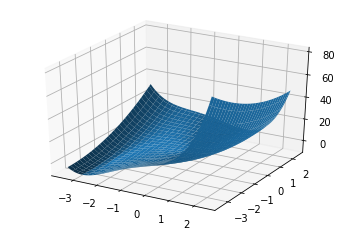

In [116]:
def plot_f(x = np.arange(-3.5, 2.5, 0.1)):
    x1 = x2 = x
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((len(x1),len(x2)))
    for i in range(0, len(x1), 1):
        for j in range(0, len(x1), 1):
            a = X1[i, j]
            b = X2[i, j]
            f[i,j] = f_slozena(a, b)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    p1 = ax.plot_surface(X1, X2, f)
    plt.show()
    
plot_f()

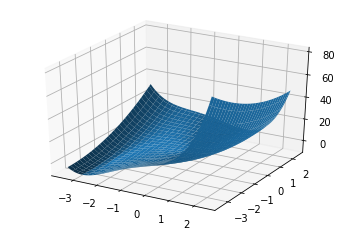

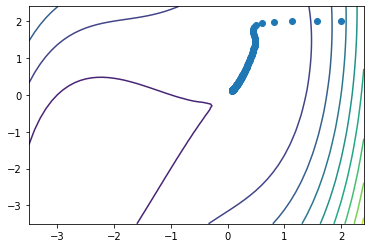

In [120]:
def plot_f(run_sd_I, x=np.arange(-3.5, 2.5, 0.1)):
    x1 = x2 = x
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((len(x1), len(x2)))
    for i in range(0, len(x1), 1):
        for j in range(0, len(x1), 1):
            a = X1[i, j]
            b = X2[i, j]
            f[i, j] = f_slozena(a, b)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    p1 = ax.plot_surface(X1, X2, f)
    plt.show()
    run_sd_I = np.reshape(run_sd_I, (len(run_sd_I), 2))
    plt.scatter(run_sd_I[:, 0], run_sd_I[:, 1])
    plt.contour(X1, X2, f, 10)
    plt.show()


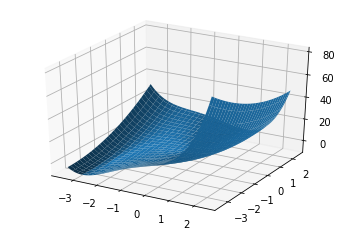

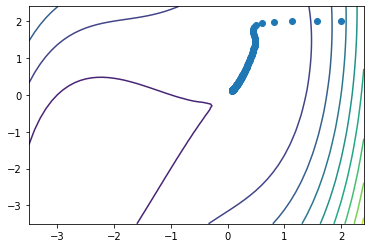

In [121]:
# Momentum
run_sdm_f = steepest_descent_with_momentum_v(
    lambda x: grad_slozena(x),
    x0 = [2, 2],
    gamma = 0.01, epsilon = 1e-4, omega = 0.5, N = 150

)

plot_f(run_sdm_f)

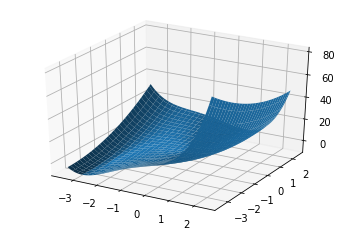

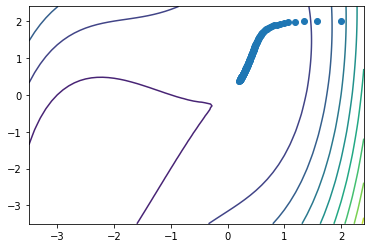

In [122]:
#Obican descent
run_sd_f= steepest_descent_v(
    lambda x: grad_slozena(x),
    x0 = [2, 2],
    gamma = 0.01,
    epsilon = 1e-4,
    N = 150
)
plot_f(run_sd_f)

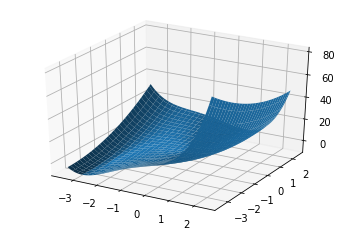

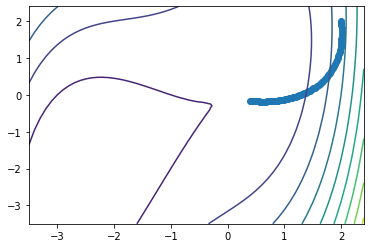

In [130]:
#Brzi Nesterov
run_n_f = nestorov_gradient_descent_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [2, 2],
    gamma = 0.01, epsilon = 1e-4, omega = 0.5, N = 100
)
plot_f(run_n_f)

## Adaptivni gradijenti metodi

Osnovni problem sa svim do sada razmatranim algoritmima leži u tome što je brzina adaptacije ista po svim osama. To znači da su ovi algoritmi neefikasni (teško je podesiti parametre) u slučajevima kada se kriterijum znatno brže menja po jednoj osi nego po drugoj. Ukoliko mala promena neke promenljive dovodi do velikih promena kriterijuma optimalnosti, tada tu promenljivu treba menjati polako, sa malim koracima. Nasuprot tome, ukoliko male promene neke promenljive dovode do neznatnih promena kriterijuma optimalnosti, tada te promenljive treba menjati brzo, sa velikim koracima. Drugačije rečeno: __brzina adaptacije treba da bude različita za svaku osu!__

### ADAGRAD

Adagrad koristi adaptivni gradijent, specifičan za svaku osu (svaku promenljivu)<br>
Neka je $g_{k,i}$ gradijenat kriterijuma optimalnosti po i-toj promenljivoj u k-toj iteraciji.
\begin{equation}
    g_{k,i} = \nabla f(x_k)_i = \frac{\partial f(x_k)}{\partial x_i}
\end{equation}

Označimo sa $G_{k,j}$ sumu kvadrata po i-toj promenljivoj, zaključno sa k-tom iteracijom.

\begin{equation}
    G_{k,i} = \sum_{j=0}^k g_{j,i}^2
\end{equation}


__ADAGRAD__ algoritam podrazumeva sledeći mehanizam ažuriranja tekuće pozicije

\begin{equation}
    x_{k+1,i} = x_{k,i} -  \frac{\gamma }{ \sqrt{G_{k,i} + \epsilon_i}}g_{k,i}
\end{equation}

$\epsilon_i$ je mali parametar koji služi za regularizaciju izraza u pošetnim iteracijama, $ \epsilon_i \approx	1e-8$

In [150]:
def adagrad_v(gradf, x0, gamma, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape = x[-1].shape)
    G = [np.zeros(shape = x[-1].shape)]
    for k in range(N):
        g = np.asarray(gradf(x[-1]))
        G.append(G[-1] + np.multiply(g, g))
        v = gamma * np.ones(shape = G[-1].shape)/(np.sqrt(G[-1]) + epsilon1) * g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

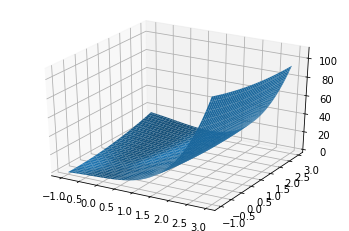

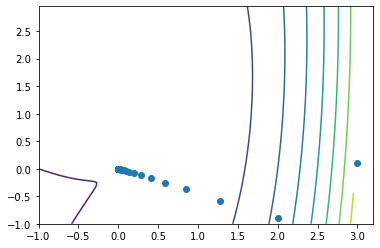

In [155]:
run_adagrad_M1, G = adagrad_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [3, 0.1],
    gamma = 1, epsilon1 = 1e-6, epsilon=1e-6, N=100
)
plot_f(run_adagrad_M1, np.arange(-1, 3, 0.05))

Osnovni problem kod ADAGRAD algoritma leži u akumulaciji gradijenata u veličini G (koja se konstantno povećava tokom vremena). __To dovodi do efektivnog smanjenja dužine koraka po svim dimenzijama, čime se i efikasnost algoritma vremenom (iz iteracije u iteraciju) smanjuje.__

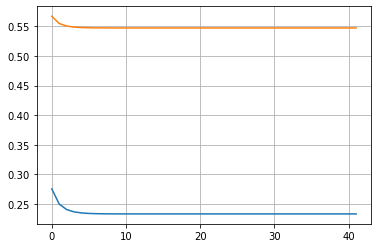

In [156]:
g1 = [1/np.sqrt(g[0,0]+1e-6) for g in G]
g2 = [1/np.sqrt(g[1,0]+1e-6) for g in G]
plt.plot(g1[2:], label="brzina ucenja u prvoj komponenti")
plt.plot(g2[2:], label="brzina ucenja u drugoj komponenti")
plt.grid()

### RMSProp

__RMSProp__ je sličan kao __ADAGRAD__, s tom razlikom da se kvadrati gradijenta ne akumuliraju neograničeno. Umesto toga, uvodi se postupak koji površno podseća na postupak uvođenja momenta kod gradijentnog algoritma.
\begin{equation}
    G_{k+1,i} = \omega G_{k,i} + (1 - \omega)g_{k,i}^2
\end{equation}
Tipična vrednost parametra $\omega$ je 0.9.

In [162]:
def rmsprop_v(gradf, x0, gamma, omega, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape = x[-1].shape)
    G = [np.zeros(shape = x[-1].shape)]
    for k in range(N):
        g = np.asarray(x[-1])
        G.append(omega*G[-1] + (1 - omega)*np.multiply(g,g))
        v = gamma*np.ones(shape=g.shape)/np.sqrt(G[-1] + epsilon1)*g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

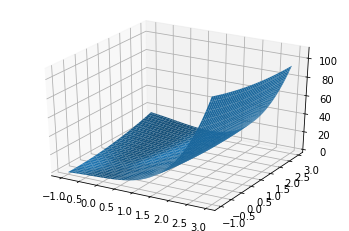

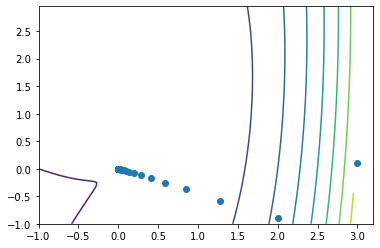

In [165]:
run_prop_M1, G = rmsprop_v(
    lambda x: quadratic_grad(x, M1),
    x0 = [3, 0.1],
    gamma = 0.1, omega=0.9, epsilon1 = 1e-6, epsilon=1e-6, N=100
)
plot_f(run_adagrad_M1, np.arange(-1, 3, 0.05))

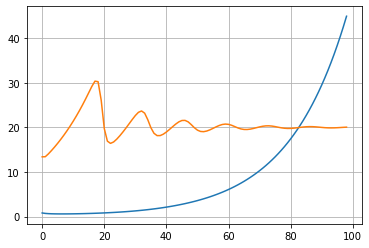

In [171]:
g1 = [1/np.sqrt(g[0,0]+1e-6) for g in G]
g2 = [1/np.sqrt(g[1,0]+1e-6) for g in G]
plt.plot(g1[2:], label="brzina ucenja u prvoj komponenti")
plt.plot(g2[2:], label="brzina ucenja u drugoj komponenti")
plt.grid()
# Prva komponenta nije dobra iz nepoznatih mi razloga. Treba obe stalno da
# rastu!

### ADADELTA

__ADADELTA__ algoritam je sličan RMSProp algoritmu, a predloženi su približno u isto vreme i nezavisno jedan od drugog. Razlika je u tome što __ADADELTA__ ne zahteva od korisnika da unese parametar $ \gamma$. On se računa automatski. Najpre se definiše veličina T

\begin{equation}
    T_{k+1,i} = \omega T_{k,i} + (1 - \omega)\Delta x_{k,i}^2
\end{equation}

a potom se definiše

\begin{equation}
    \gamma_{k,i} = \sqrt{T_{k,i}+\epsilon_1}
\end{equation}

tako da na kraju

\begin{equation}
    x_{k+1,i} = x_{k,i} - \frac{\sqrt{T_{k,i} + \epsilon_1}}{\sqrt{G_{k,i} + \epsilon_1}}g_{k,i}
\end{equation}

In [172]:
def adadelta_v(gradf, x0, omega, epsilon1, epsilon, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = np.zeros(shape = x[-1].shape)
    G = [np.zeros(shape = x[-1].shape)]
    T = [np.zeros(shape = x[-1].shape)]
    for k in range(N):
        g = np.asarray(x[-1])
        G.append(omega*G[-1] + (1 - omega)*np.multiply(g,g))
        T.append(omega*T[-1] + (1 - omega)*np.multiply(v,v))
        v = np.sqrt(T[-1]+epsilon1)/np.sqrt(G[-1]+epsilon1)*g
        x.append(x[-1] - v)
        if np.linalg.norm(g) < epsilon:
            break
    return x, G

### ADAM

__ADAM__ (Adaptive Moment Estimation) je jedna od najčešće koriščenih savremenih modifikacija algoritma najstrmijeg pada.
Najpre se definišu pomoćne veličine

\begin{equation}
    m_k = \omega_1m_{k-1} + (1 - \omega_1)g_k
\end{equation}

\begin{equation}
    v_k = \omega_2v_{k-1} + (1 - \omega_2)g_k^2
\end{equation}

te njihove korigovane verzije

\begin{equation}
    \hat{m_k} = \frac{m_k}{1 - \omega_1}
\end{equation}
\begin{equation}
    \hat{v_k} = \frac{v_k}{1 - \omega_2}
\end{equation}

Potom se tekuće rešenje ažurira po algortmu

\begin{equation}
    x_{k+1} = x_k - \frac{\gamma}{\sqrt{v_{k} + \epsilon_1}}m_k
\end{equation}

In [174]:
def adam_v(gradf, x0, gamma, omega1, omega2, epsilon1, epsilon2, N):
    x = [np.array(x0).reshape(len(x0), 1)]
    v = [np.zeros(shape = x[-1].shape)]
    m = [np.zeros(shape = x[-1].shape)]
    for k in range(N):
        g = np.asarray(x[-1])
        #Prof je ovde napisao v[-1] a ispod m[-1], vrv greska
        m.append(omega1*m[-1] + (1-omega1)*g)
        v.append(omega2*v[-1] + (1-omega2)*np.multiply(g, g))
        hat_v = np.abs(v[-1]/(1-omega1))
        hat_m = np.abs(m[-1]/(1-omega2))
        x.append(x[-1] - gamma * np.ones(shape=g.shape)/np.sqrt(hat_v + epsilon1)*hat_m)
        if np.linealg.norm(g) < epsilon:
            break
    return x, G